# Visualizing Nigerian Covid-19 cases based on the NCDC API :)

In [1]:
# Importing all libraries
# Loading the datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context("paper")

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "seaborn"
from plotly.subplots import make_subplots

df = pd.read_csv('NCDC.csv')
df.head(10)

,Date,total_confirmed_cases,total_discharged,total_deaths,total_active_cases,new_confirmed_cases,new_discharged,new_deaths,State,data
0,2020-06-29,302.0,207.0,3.0,92.0,0.0,0.0,0.0,Abia,NaN
1,2020-06-29,84.0,47.0,6.0,31.0,0.0,9.0,0.0,Adamawa,NaN
2,2020-06-29,124.0,47.0,5.0,72.0,8.0,0.0,0.0,Osun,NaN
3,2020-06-29,1372.0,686.0,12.0,674.0,66.0,180.0,1.0,Oyo,NaN
4,2020-06-29,1211.0,904.0,51.0,256.0,11.0,38.0,0.0,Kano,NaN
5,2020-06-29,317.0,191.0,6.0,120.0,0.0,0.0,0.0,Jigawa,NaN
6,2020-06-29,198.0,100.0,12.0,86.0,13.0,3.0,0.0,Bayelsa,NaN
7,2020-06-29,43.0,29.0,2.0,12.0,0.0,0.0,0.0,Ekiti,NaN
8,2020-06-29,965.0,190.0,23.0,752.0,53.0,0.0,1.0,Delta,NaN
9,2020-06-29,59.0,30.0,1.0,28.0,12.0,15.0,0.0,Benue,NaN


In [17]:
# Renaming the dataframe for convinence
df.rename(columns={'total_confirmed_cases':'Confirmed',
          'total_discharged':'Discharged', 
          'total_deaths':'Deaths', 
          'total_active_cases':'Active',
          'new_confirmed_cases':'NCases', 
          'new_discharged':'NDischarges', 
          'new_deaths':'NDeaths'},
          inplace=True)

In [18]:
# Inspecting the new columns
df['data'].isnull().sum()

2874

In [19]:
# dropping (delete) the data columns
df.drop('data', axis=1, inplace=True)
# df.columns

In [20]:
df.columns

Index(['Date', 'Confirmed', 'Discharged', 'Deaths', 'Active', 'NCases',
       'NDischarges', 'NDeaths', 'State'],
      dtype='object')

###  Active cases around the the Natiion

In [22]:
top = df[df['Date'] == df['Date'].max()]
States = top.groupby('State')['Confirmed','Active','Deaths'].sum().reset_index()
States.head(10)

,State,Confirmed,Active,Deaths
0,Abia,302.0,92.0,3.0
1,Adamawa,84.0,31.0,6.0
2,Akwa Ibom,86.0,30.0,2.0
3,Anambra,73.0,7.0,9.0
4,Bauchi,500.0,49.0,12.0
5,Bayelsa,198.0,86.0,12.0
6,Benue,59.0,28.0,1.0
7,Borno,491.0,37.0,32.0
8,Delta,965.0,752.0,23.0
9,Ebonyi,438.0,91.0,3.0


[Text(0, 0.5, 'Total cases'), Text(0.5, 0, 'Dates')]

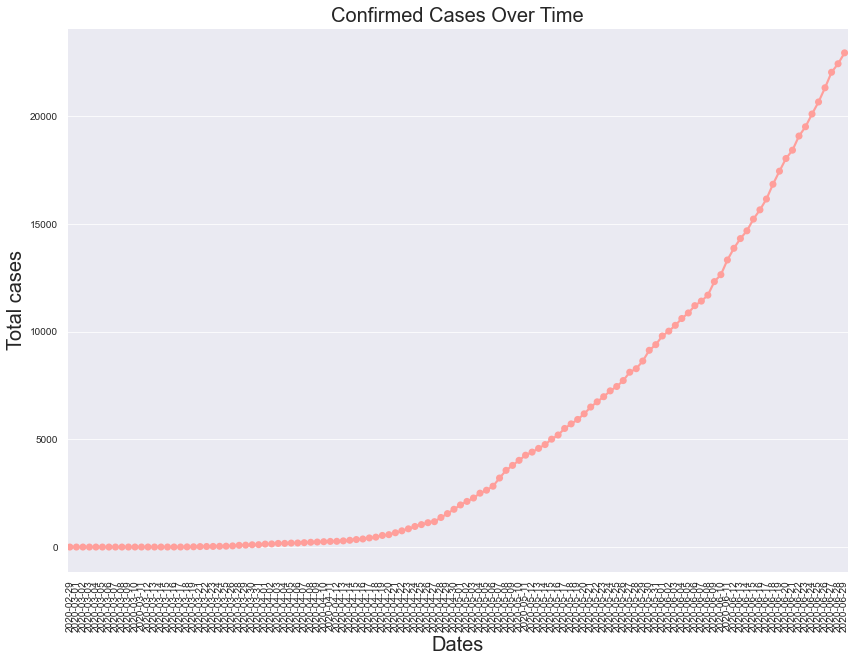

In [29]:
# Confirmed cases over time
plt.figure(figsize= (14,10))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Confirmed Cases Over Time" , fontsize = 20)
total_cases = df.groupby('Date')['Date', 'Confirmed'].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])


ax = sns.pointplot( x = total_cases.Date.dt.date ,y = total_cases.Confirmed , color = 'r')
ax.set(xlabel='Dates', ylabel='Total cases')

### The Top (20) States with most Confirmed Covid Cases 

In [31]:
top = df[df['Date'] == df['Date'].max()]
top_confirmed = top.groupby(by = 'State')['Confirmed'].sum().sort_values(ascending = False).head(20).reset_index()
top_confirmed

,State,Confirmed
0,Lagos,10310.0
1,Oyo,1372.0
2,Kano,1211.0
3,Rivers,1056.0
4,Edo,986.0
5,Delta,965.0
6,Ogun,807.0
7,Kaduna,714.0
8,Katsina,551.0
9,Gombe,503.0


[Text(0, 0.5, 'State'), Text(0.5, 0, 'Total cases')]

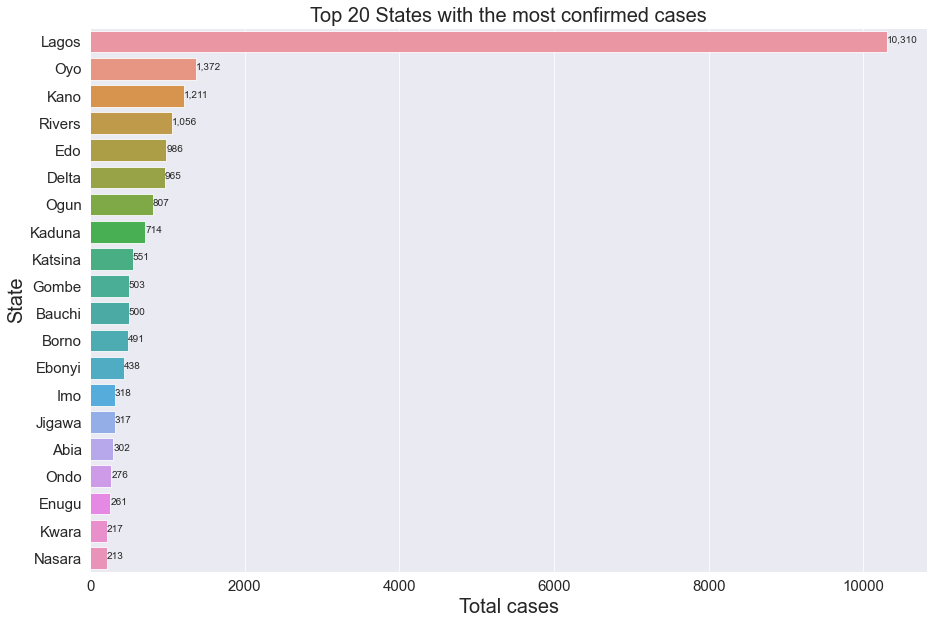

In [32]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 20)
plt.ylabel('Country',fontsize = 20)
plt.title("Top 20 States with the most confirmed cases" , fontsize = 20)
ax = sns.barplot(x = top_confirmed.Confirmed, y = top_confirmed.State)
for i, (value, name) in enumerate(zip(top_confirmed.Confirmed,top_confirmed.State)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='State')

### Top (20) States with Active Cases

In [33]:
top_actives = top.groupby(by = 'State')['Active'].sum().sort_values(ascending = False).head(20).reset_index()
top_actives

,State,Active
0,Lagos,8590.0
1,Delta,752.0
2,Oyo,674.0
3,Edo,670.0
4,Rivers,413.0
5,Imo,273.0
6,Katsina,259.0
7,Kano,256.0
8,Kaduna,224.0
9,Ogun,219.0


[Text(0, 0.5, 'State'), Text(0.5, 0, 'Total cases')]

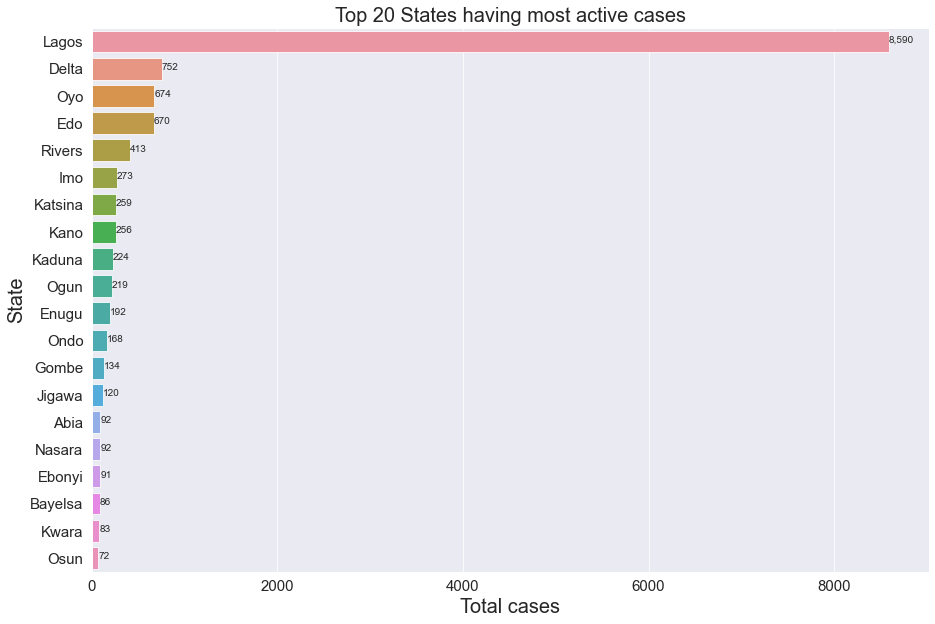

In [35]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 20)
plt.ylabel('States',fontsize = 20)
plt.title("Top 20 States having most active cases" , fontsize = 20)
ax = sns.barplot(x = top_actives.Active, y = top_actives.State)
for i, (value, name) in enumerate(zip(top_actives.Active, top_actives.State)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='State')

### Top (20) State with Deaths

In [37]:
top_deaths = top.groupby(by = 'State')['Deaths'].sum().sort_values(ascending = False).head(20).reset_index()
top_deaths

,State,Deaths
0,Lagos,127.0
1,Kano,51.0
2,Rivers,38.0
3,Edo,36.0
4,Borno,32.0
5,Delta,23.0
6,Katsina,22.0
7,Gombe,19.0
8,Ondo,19.0
9,Ogun,18.0


[Text(0, 0.5, 'State'), Text(0.5, 0, 'Total cases')]

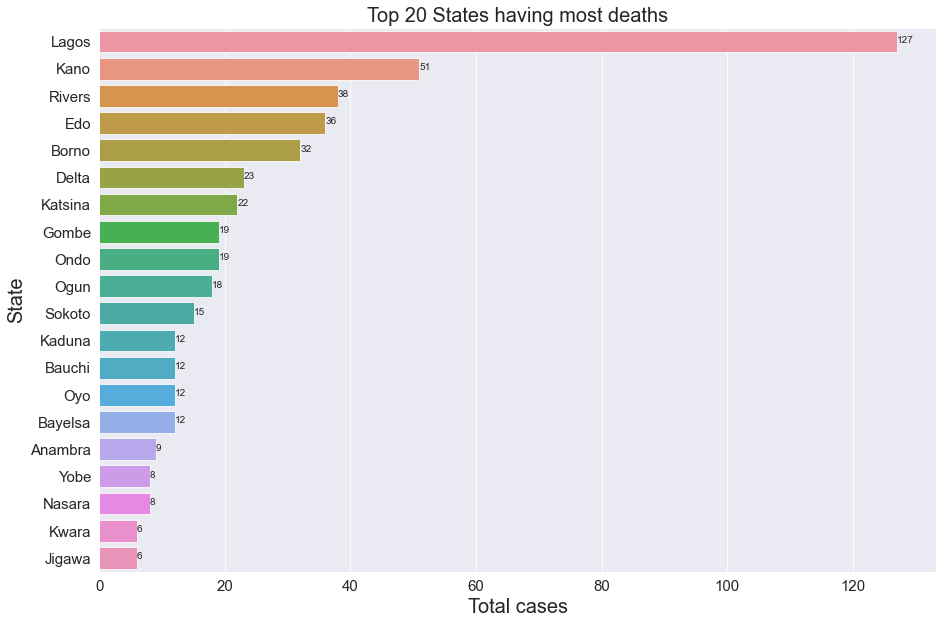

In [39]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 20)
plt.ylabel('States',fontsize = 20)
plt.title("Top 20 States having most deaths" , fontsize = 20)
ax = sns.barplot(x = top_deaths.Deaths, y = top_deaths.State)
for i, (value, name) in enumerate(zip(top_deaths.Deaths,top_deaths.State)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='State')

### Top 20 States having the worst mortality and best recovery rate:

In [40]:
df.columns

Index(['Date', 'Confirmed', 'Discharged', 'Deaths', 'Active', 'NCases',
       'NDischarges', 'NDeaths', 'State'],
      dtype='object')

In [44]:
rate = top.groupby(by = 'State')['Discharged','Confirmed','Deaths'].sum().reset_index()
rate['Recovery Percentage'] =  round(((rate['Discharged']) / (rate['Confirmed'])) * 100 , 2)
rate['Death Percentage'] =  round(((rate['Deaths']) / (rate['Confirmed'])) * 100 , 2)
rate.head()

,State,Discharged,Confirmed,Deaths,Recovery Percentage,Death Percentage
0,Abia,207.0,302.0,3.0,68.54,0.99
1,Adamawa,47.0,84.0,6.0,55.95,7.14
2,Akwa Ibom,54.0,86.0,2.0,62.79,2.33
3,Anambra,57.0,73.0,9.0,78.08,12.33
4,Bauchi,439.0,500.0,12.0,87.80,2.40


In [45]:
mortality = rate.groupby(by = 'State')['Death Percentage'].sum().sort_values(ascending = False).head(20).reset_index()
mortality

,State,Death Percentage
0,Yobe,13.56
1,Anambra,12.33
2,Sokoto,9.93
3,Kebbi,7.89
4,Adamawa,7.14
5,Ondo,6.88
6,Zamfara,6.58
7,Borno,6.52
8,Bayelsa,6.06
9,Ekiti,4.65


[Text(0, 0.5, 'State'), Text(0.5, 0, 'Mortality Rate in percentage')]

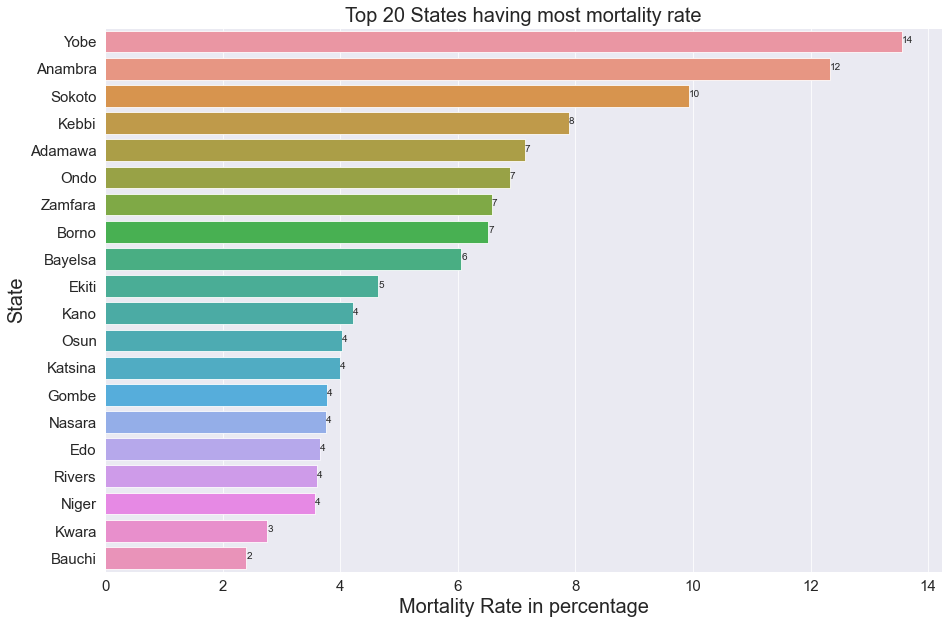

In [47]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 20)
plt.ylabel('Country',fontsize = 20)
plt.title("Top 20 States having most mortality rate" , fontsize = 20)
ax = sns.barplot(x = mortality['Death Percentage'], y = mortality.State)
for i, (value, name) in enumerate(zip(mortality['Death Percentage'], mortality.State)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Mortality Rate in percentage', ylabel='State')

### Top (20) States with most Recovery Rate:

In [48]:
recovery = rate.groupby(by = 'State')['Recovery Percentage'].sum().sort_values(ascending = False).head(20).reset_index()
recovery

,State,Recovery Percentage
0,Zamfara,93.42
1,Bauchi,87.80
2,Borno,85.95
3,Yobe,81.36
4,Ebonyi,78.54
5,Sokoto,78.15
6,Anambra,78.08
7,Kano,74.65
8,Ogun,70.63
9,Gombe,69.58


[Text(0, 0.5, 'State'), Text(0.5, 0, 'Recovery Rate in percentage')]

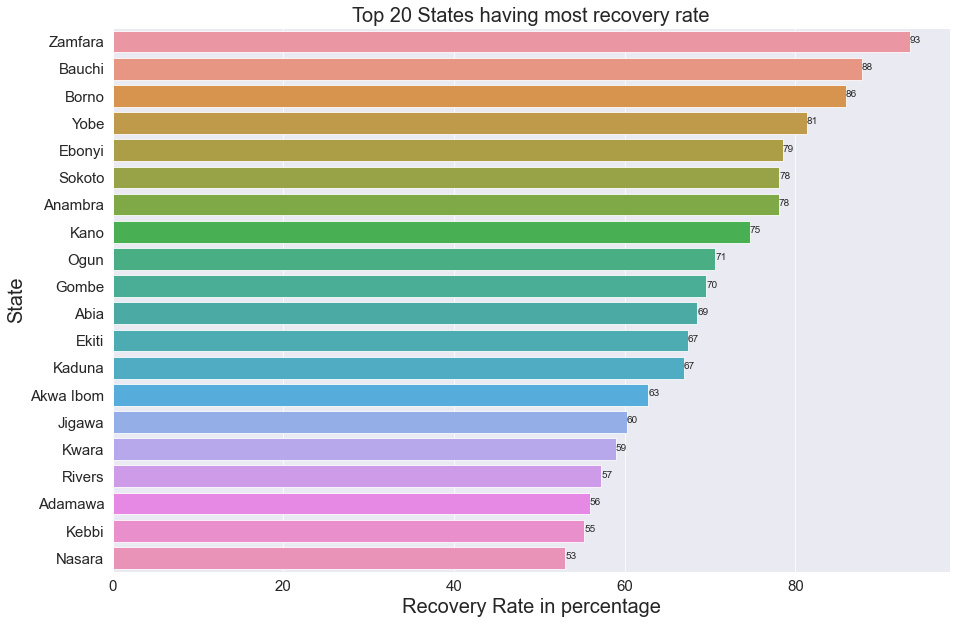

In [50]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 20)
plt.ylabel('State',fontsize = 20)
plt.title("Top 20 States having most recovery rate" , fontsize = 20)
ax = sns.barplot(x = recovery['Recovery Percentage'], y = recovery.State)
for i, (value, name) in enumerate(zip(recovery['Recovery Percentage'], recovery.State)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Recovery Rate in percentage', ylabel='State')